In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.size

140000

In [9]:
df.shape

(10000, 14)

In [10]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.groupby('Tenure')['Exited'].value_counts()

Tenure  Exited
0       0         318
        1          95
1       0         803
        1         232
2       0         847
        1         201
3       0         796
        1         213
4       0         786
        1         203
5       0         803
        1         209
6       0         771
        1         196
7       0         851
        1         177
8       0         828
        1         197
9       0         771
        1         213
10      0         389
        1         101
Name: Exited, dtype: int64

In [13]:
df.groupby('Exited')['Tenure'].value_counts()

Exited  Tenure
0       7         851
        2         847
        8         828
        1         803
        5         803
        3         796
        4         786
        6         771
        9         771
        10        389
        0         318
1       1         232
        3         213
        9         213
        5         209
        4         203
        2         201
        8         197
        6         196
        7         177
        10        101
        0          95
Name: Tenure, dtype: int64

<AxesSubplot:xlabel='Tenure', ylabel='Exited'>

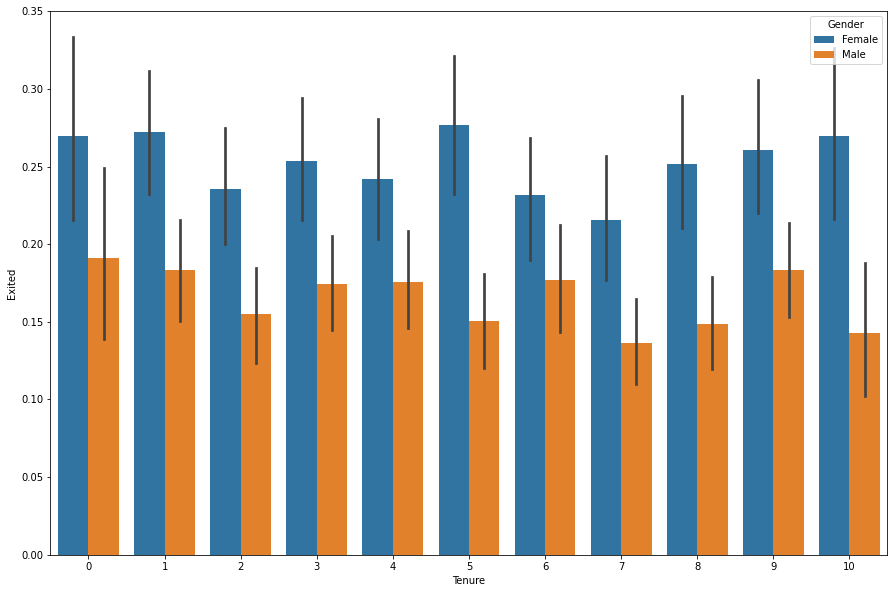

In [14]:
plt.figure(figsize=(15,10))
sns.barplot(x='Tenure',y='Exited',hue='Gender',data=df)

<AxesSubplot:xlabel='Tenure', ylabel='Exited'>

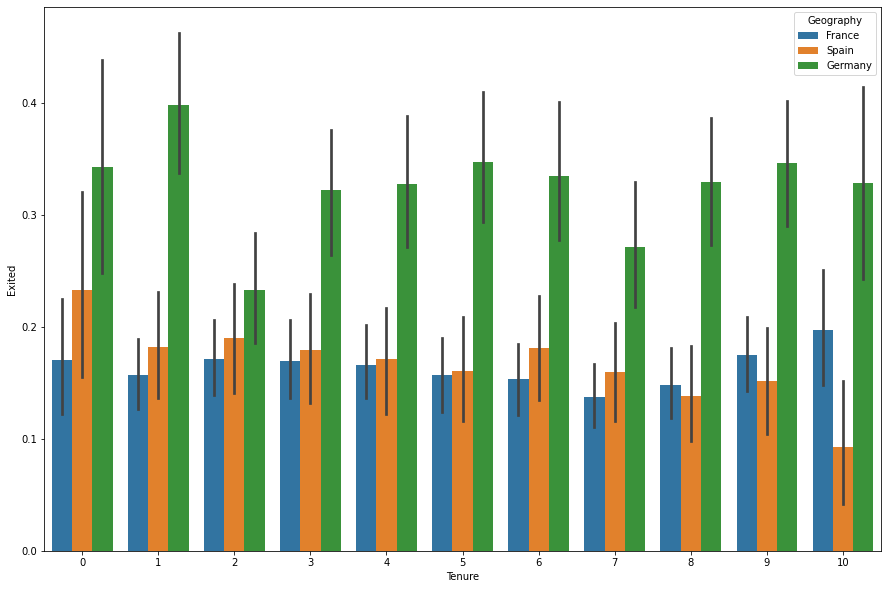

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(data=df,x='Tenure',y='Exited',hue=df['Geography'])

RowNumber             AxesSubplot(0.125,0.799681;0.352273x0.0803191)
CustomerId         AxesSubplot(0.547727,0.799681;0.352273x0.0803191)
CreditScore           AxesSubplot(0.125,0.703298;0.352273x0.0803191)
Age                AxesSubplot(0.547727,0.703298;0.352273x0.0803191)
Tenure                AxesSubplot(0.125,0.606915;0.352273x0.0803191)
Balance            AxesSubplot(0.547727,0.606915;0.352273x0.0803191)
NumOfProducts         AxesSubplot(0.125,0.510532;0.352273x0.0803191)
HasCrCard          AxesSubplot(0.547727,0.510532;0.352273x0.0803191)
IsActiveMember        AxesSubplot(0.125,0.414149;0.352273x0.0803191)
EstimatedSalary    AxesSubplot(0.547727,0.414149;0.352273x0.0803191)
Exited                AxesSubplot(0.125,0.317766;0.352273x0.0803191)
dtype: object

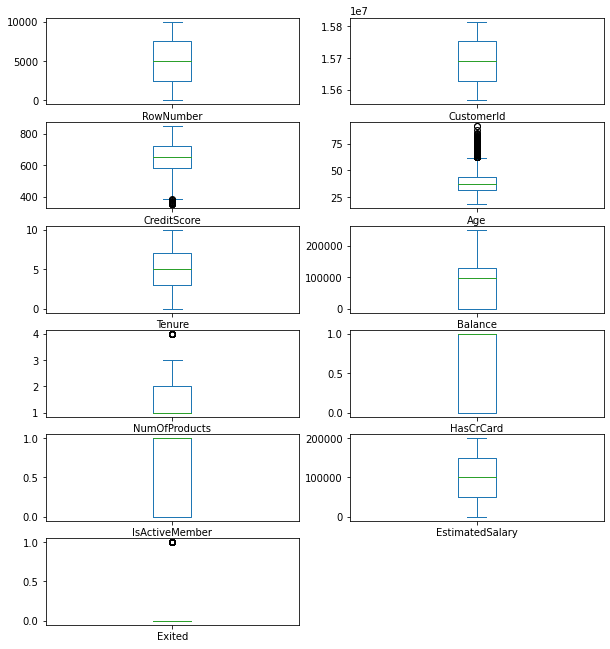

In [16]:
df.plot(kind='box',subplots=True,layout=(8,2),figsize=(10,15))

<AxesSubplot:xlabel='Tenure', ylabel='count'>

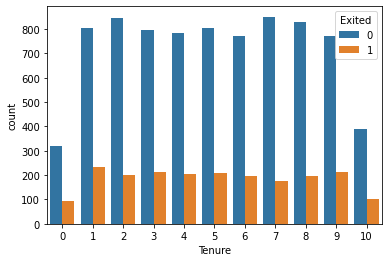

In [17]:
sns.countplot(x=df['Tenure'],hue=df['Exited'])

<AxesSubplot:xlabel='Age', ylabel='count'>

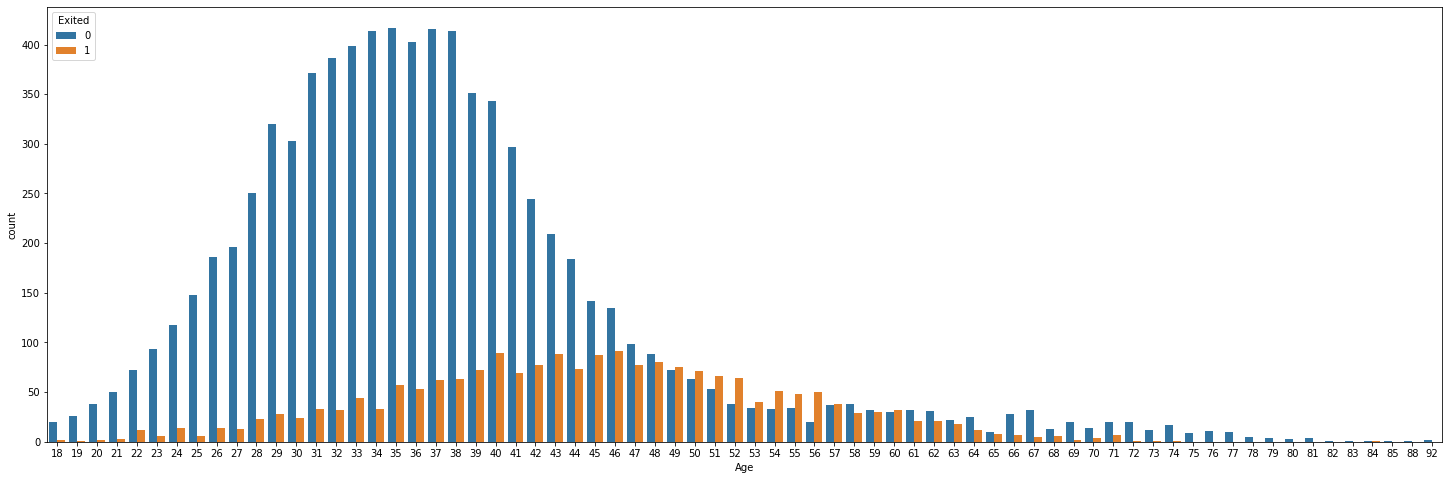

In [18]:
plt.figure(figsize=(25,8))
sns.countplot(x=df['Age'],hue=df['Exited'])

In [19]:
states=pd.get_dummies(df['Geography'])

In [20]:
gender=pd.get_dummies(df['Gender'])

In [21]:
df=df.drop(['RowNumber','CustomerId', 'Surname'],axis=1)

In [22]:
df=pd.concat([df,states,gender],axis=1)

In [23]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'France', 'Germany', 'Spain', 'Female', 'Male'],
      dtype='object')

In [24]:
df.drop(['Gender','Geography','Female'],axis=1,inplace=True)

In [25]:
df.rename({'Male':'Gender'},axis=1,inplace=True)

In [26]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'France', 'Germany',
       'Spain', 'Gender'],
      dtype='object')

In [27]:
x=df[[  'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'France', 'Germany', 'Spain',
       'Gender']]

In [28]:
y=df['Exited']

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc=StandardScaler()

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [32]:
x_train=sc.fit_transform(x_train)

In [33]:
x_train

array([[ 0.87518702,  1.0527823 ,  1.39098014, ..., -0.58312392,
         1.74133801,  0.9148601 ],
       [-0.71366184, -0.85456159, -1.03754326, ..., -0.58312392,
        -0.57427105,  0.9148601 ],
       [-0.30866115,  1.52961828,  0.69711631, ...,  1.71490137,
        -0.57427105, -1.0930633 ],
       ...,
       [-0.50596918, -1.61749915,  0.69711631, ..., -0.58312392,
         1.74133801, -1.0930633 ],
       [ 0.90634092, -0.18699123,  0.69711631, ...,  1.71490137,
        -0.57427105,  0.9148601 ],
       [ 0.2417244 , -0.28235842, -1.03754326, ..., -0.58312392,
        -0.57427105,  0.9148601 ]])

In [34]:
x_train.shape

(8000, 12)

In [35]:
x_test.shape

(2000, 12)

In [36]:
y_train.shape

(8000,)

In [37]:
y_test.shape

(2000,)

In [38]:
x_test=sc.fit_transform(x_test)

In [39]:
import keras

In [40]:
from keras.models import Sequential
from keras.layers import Dense

In [41]:
classifier=Sequential()

In [42]:
#To add the layers
#Dense helps to contruct the neurons
#Input Dimension means we have 11 features 
# Units is to create the hidden layers
#Uniform helps to distribute the weight uniformly
#Classifier.add(Dense(activation = "relu",input_dim = 11,units = 6,kernel_initializer = "uniform"))

classifier.add(Dense(activation='relu',input_dim=12,units=6,kernel_initializer="uniform"))

In [44]:
#Classifier.add(Dense(activation = "relu",units = 6,kernel_initializer = "uniform")) 
classifier.add(Dense(activation='relu',units=6,kernel_initializer='uniform')) # #Adding second hidden layers

In [45]:
classifier.add(Dense(activation='sigmoid',units=1,kernel_initializer="uniform"))

In [46]:
#Classifier.compile(optimizer="adam",loss = 'binary_crossentropy',metrics = ['accuracy']) #To compile the Artificial Neural Network. Ussed Binary crossentropy as we just have only two output

classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [47]:
classifier.summary() # #3 layers created. 6 neurons in 1st, 6neurons in 2nd layer and 1 neuron in last

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 78        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [49]:
classifier.fit(x_train,y_train,batch_size=10,epochs=50)

Epoch 1/50
800/800 [==============================] - 7s 5ms/step - loss: 0.4883 - accuracy: 0.7962
Epoch 2/50
800/800 [==============================] - 2s 3ms/step - loss: 0.4253 - accuracy: 0.8039
Epoch 3/50
800/800 [==============================] - 3s 3ms/step - loss: 0.4159 - accuracy: 0.8267
Epoch 4/50
800/800 [==============================] - 4s 5ms/step - loss: 0.4096 - accuracy: 0.8311
Epoch 5/50
800/800 [==============================] - 2s 3ms/step - loss: 0.4051 - accuracy: 0.8355
Epoch 6/50
800/800 [==============================] - 3s 4ms/step - loss: 0.4028 - accuracy: 0.8382
Epoch 7/50
800/800 [==============================] - 2s 3ms/step - loss: 0.4012 - accuracy: 0.8365
Epoch 8/50
800/800 [==============================] - 2s 3ms/step - loss: 0.3996 - accuracy: 0.8379
Epoch 9/50
800/800 [==============================] - 2s 2ms/step - loss: 0.3985 - accuracy: 0.8369
Epoch 10/50
800/800 [==============================] - 2s 2ms/step - loss: 0.3970 - accuracy: 0.8390

In [50]:
y_pred=classifier.predict(x_test)

63/63 [==============================] - 0s 1ms/step


In [53]:
y_pred = (y_pred > 0.5) 

In [54]:
cm=confusion_matrix(y_test,y_pred)

In [55]:
cm

array([[1515,   73],
       [ 231,  181]], dtype=int64)

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay

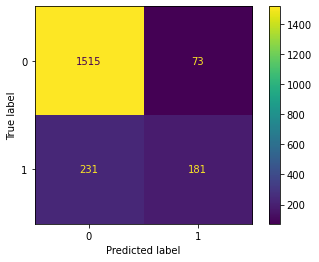

In [57]:
dist=ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1588
           1       0.71      0.44      0.54       412

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.73      2000
weighted avg       0.84      0.85      0.83      2000



In [59]:
accuracy_score(y_test,y_pred)

0.848

Text(69.0, 0.5, 'Truth')

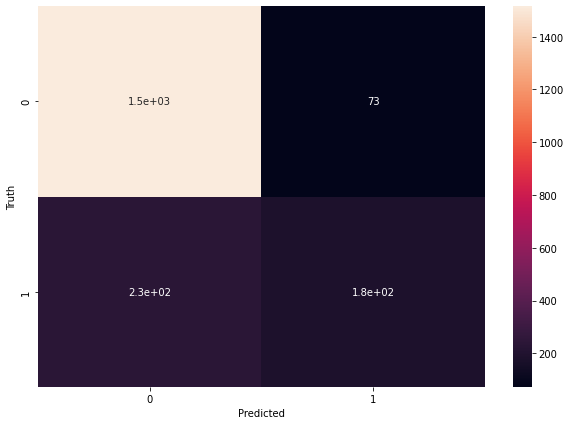

In [60]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')